# Введение в нейронные сети
### Урок 3. TensorFlow

1. Попробуйте улучшить работу нейронной сети (разобранную на уроке), обучавшейся на датасет Fashion-MNIST. Напишите в комментариях к уроку, какого результата вы добились от нейросети и что помогло улучшить её точность <br>
2. Поработайте с документацией TensorFlow 2. Попробуйте найти полезные команды TensorFlow, неразобранные на уроке <br>
3. Попробуйте обучить нейронную сеть на TensorFlow 2 на датасете imdb_reviews.

In [1]:
import keras
import datetime
from keras.layers import *
import keras.utils
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import GridSearchCV
from scikeras.wrappers import KerasClassifier

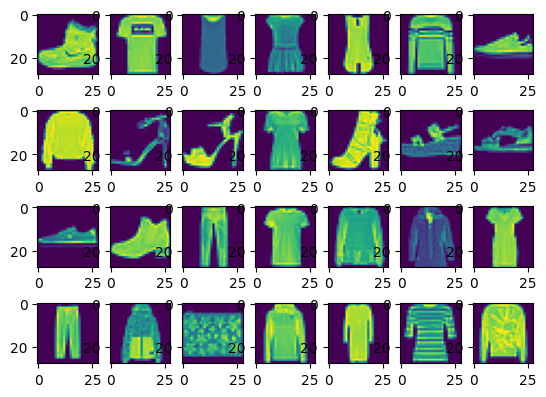

In [2]:
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()

for i in range(28):
    plt.subplot(4,7,i+1)
    plt.imshow(x_train[i])
plt.show()

In [3]:
input_shape = (28, 28, 1)
x_train = x_train / 255
x_test = x_test / 255
y_train_cat = keras.utils.to_categorical(y_train, 10)
y_test_cat = keras.utils.to_categorical(y_test, 10)

In [5]:
def create_model():
  model = keras.Sequential([
    keras.Input(shape=input_shape),
    Conv2D(32, padding = 'same', kernel_size = (3,3), activation = 'relu' ),
    MaxPooling2D( (2,2), strides = 2),
    Flatten(), # перевод в одномерный массив
    Dense(50, activation = 'relu'), # количество входных нейронов
    Dense(10, activation = 'softmax')   # количество выходных нейронов
    ] )
      
  model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
  
  return model

# если в течении 3 эпох точность не будет расти, то обучение прервется
# es_callback = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=3)
    

In [ ]:
# model = keras.Sequential([
#       keras.Input(shape=input_shape),
#       Conv2D(32, padding = 'same', kernel_size = (3,3), activation = 'relu' ),
#       MaxPooling2D( (2,2), strides = 2),
#       Flatten(), # перевод в одномерный массив
#       Dense(50, activation = 'relu'), # количество входных нейронов
#       Dense(10, activation = 'softmax')   # количество выходных нейронов
#       ] )

In [ ]:
# model.compile(optimizer='adam',
#              loss='categorical_crossentropy',
#              metrics=['accuracy'])


Перед обучение модели добавим защиту от переобучения EarlyStopping


In [ ]:
# # если в течении 3 эпох точность не будет расти, то обучение прервется
# es_callback = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=3)

In [ ]:
model_32 = create_model()

In [ ]:
%%time
history_model_32 = model_32.fit(x_train, y_train_cat, batch_size=32, epochs=10, validation_data =(x_test, y_test_cat), verbose=0, callbacks=[es_callback] )
if es_callback.stopped_epoch >=1:
    print(f'Обучение остановлено на {es_callback.stopped_epoch} эпохе')
test_loss, test_acc = model.evaluate(x_test, y_test_cat, verbose=2)
print(f'Точность модели: {100*test_acc:.2f} %')

Попробуем увеличить количество батчей в учебной модели до 100 и 250 и посмотри результаты

In [ ]:
model_100 = create_model()

In [ ]:
%%time

history_model_100 = model.fit(x_train, y_train_cat, batch_size=100, epochs=10, validation_data =(x_test, y_test_cat), verbose=0, callbacks=[es_callback] )
if es_callback.stopped_epoch >=1:
    print(f'Обучение остановлено на {es_callback.stopped_epoch} эпохе')
test_loss, test_acc = model.evaluate(x_test, y_test_cat, verbose=2)
print(f'Точность модели: {100*test_acc:.2f} %')

In [ ]:
model_250 = create_model()

In [ ]:
%%time

history_model_250 = model.fit(x_train, y_train_cat, batch_size=250, epochs=10, validation_data =(x_test, y_test_cat), verbose=0, callbacks=[es_callback] )
if es_callback.stopped_epoch >=1:
    print(f'Обучение остановлено на {es_callback.stopped_epoch} эпохе')
test_loss, test_acc = model.evaluate(x_test, y_test_cat, verbose=2)
print(f'Точность модели: {100*test_acc:.2f} %')

In [ ]:
plt.plot(history_model_32.history['val_accuracy'])
plt.plot(history_model_100.history['val_accuracy'])
plt.plot(history_model_250.history['val_accuracy'])
plt.title('Точность модели')
plt.ylabel('точность')
plt.xlabel('количество эпох')
plt.legend(['model_batch_32', 'model_batch_100', 'history_model_250'], loc='upper left')
plt.show()

Проверим учебную модель из семинара на 3х разных батчах: 32, 100, 250

In [ ]:
def create_model():
  model = keras.Sequential([
    keras.Input(shape=input_shape),
    Conv2D(32, padding = 'same', kernel_size = (3,3), activation = 'relu' ),
    MaxPooling2D( (2,2), strides = 2),
    Flatten(), # перевод в одномерный массив
    Dense(50, activation = 'relu'), # количество входных нейронов
    Dense(10, activation = 'softmax')   # количество выходных нейронов
    ] )
      
  model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
  
  return model

# если в течении 3 эпох точность не будет расти, то обучение прервется
es_callback = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=3)
    
batch_size_list = [32, 100, 250]    
    

In [ ]:
model = KerasClassifier(create_model)
params = dict(batch_size=batch_size_list, epochs=[10], optimizer=['Adam'])
grid = GridSearchCV(model, params, refit=False, cv=3, scoring='accuracy')

grid_result = grid.fit(x_train, y_train_cat, verbose=0, callbacks=[es_callback])
if es_callback.stopped_epoch >=1:
    print(f'Обучение остановлено на {es_callback.stopped_epoch} эпохе')
test_loss, test_acc = model.evaluate(x_test, y_test_cat, verbose=2)
print(f'Точность модели: {100*test_acc:.2f} %')   
print(grid_result.best_score_, grid_result.best_params_)

In [ ]:

%%time
for i in batch_size:
    history_model_100 = model.fit(x_train, y_train_cat, batch_size=i, epochs=10, validation_data =(x_test, y_test_cat), verbose=0, callbacks=[es_callback] )
    if es_callback.stopped_epoch >=1:
        print(f'Обучение остановлено на {es_callback.stopped_epoch} эпохе')
    test_loss, test_acc = model.evaluate(x_test, y_test_cat, verbose=2)
    print(f'Точность модели: {100*test_acc:.2f} %')    

In [6]:
%%time

batch_size_list = [32, 100, 250]
res_model = {}
for el in val:
    model_el = create_model()
    es_callback = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=3)


    history = model_el.fit(x_train, y_train_cat, batch_size=el, epochs=2, validation_data =(x_test, y_test_cat), verbose=1, callbacks=[es_callback] )
    if es_callback.stopped_epoch >=1:
        print(f'Обучение остановлено на {es_callback.stopped_epoch} эпохе')
    test_loss, test_acc = model_el.evaluate(x_test, y_test_cat, verbose=2)
    print(f'Точность модели {model_el}: {100*test_acc:.2f} %')
    res_val[f'model_{el}'] = history

Epoch 1/2
1875/1875 [==============================] - 27s 14ms/step - loss: 0.4143 - accuracy: 0.8532 - val_loss: 0.3344 - val_accuracy: 0.8794
Epoch 2/2
1875/1875 [==============================] - 28s 15ms/step - loss: 0.2878 - accuracy: 0.8964 - val_loss: 0.3076 - val_accuracy: 0.8910
313/313 - 1s - loss: 0.3076 - accuracy: 0.8910 - 1s/epoch - 5ms/step
Точность модели: 89.10 %
Epoch 1/2
600/600 [==============================] - 21s 33ms/step - loss: 0.4848 - accuracy: 0.8328 - val_loss: 0.3997 - val_accuracy: 0.8566
Epoch 2/2
600/600 [==============================] - 20s 33ms/step - loss: 0.3255 - accuracy: 0.8847 - val_loss: 0.3191 - val_accuracy: 0.8848
313/313 - 2s - loss: 0.3191 - accuracy: 0.8848 - 2s/epoch - 5ms/step
Точность модели: 88.48 %
Epoch 1/2
120/120 [==============================] - 16s 127ms/step - loss: 0.6702 - accuracy: 0.7750 - val_loss: 0.4448 - val_accuracy: 0.8424
Epoch 2/2
120/120 [==============================] - 15s 122ms/step - loss: 0.3909 - accurac

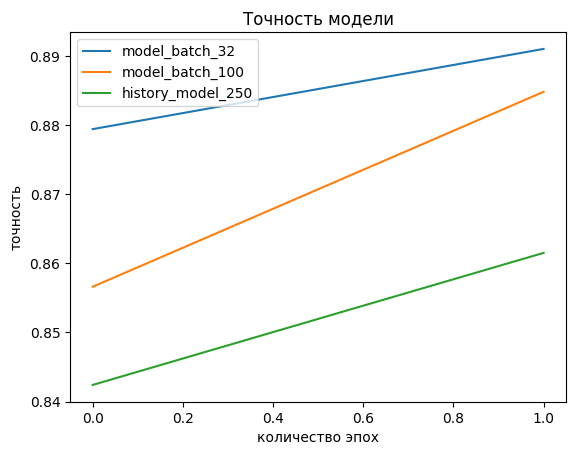

In [9]:
plt.plot(res_model['model_32'].history['val_accuracy'])
plt.plot(res_model['model_100'].history['val_accuracy'])
plt.plot(res_model['model_500'].history['val_accuracy'])
plt.title('Точность модели')
plt.ylabel('точность')
plt.xlabel('количество эпох')
plt.legend(['model_batch_32', 'model_batch_100', 'history_model_250'], loc='upper left')
plt.show()